In [8]:
# 使用人脸识别数据集
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import  os
data_home = os.path.expanduser(r'C:\Users\lenovo\scikit_learn_data')
faces = fetch_lfw_people(min_faces_per_person=60)

In [11]:
X = faces.data
y = faces.target
print(X.shape)

(1348, 2914)


In [12]:
faces.images.shape

(1348, 62, 47)

In [13]:
faces.data.shape

(1348, 2914)

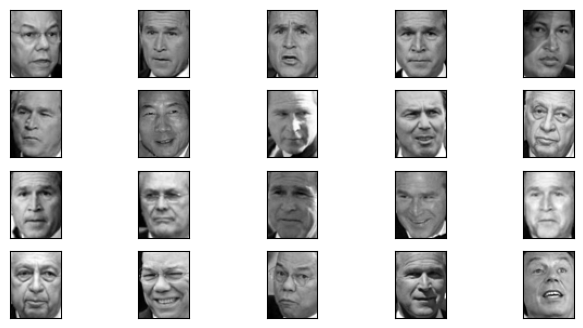

In [18]:
# flat 之后 不能再shape
# 绘制人脸
fig, axes = plt.subplots(4, 5, figsize=(8, 4),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i , ax in enumerate(axes.flat):
    ax.imshow(faces.images[i, :, :], cmap="gray")
    

In [19]:
# 降维
pca = PCA(n_components=150).fit(X)
V = pca.components_
print(V.shape)

(150, 2914)


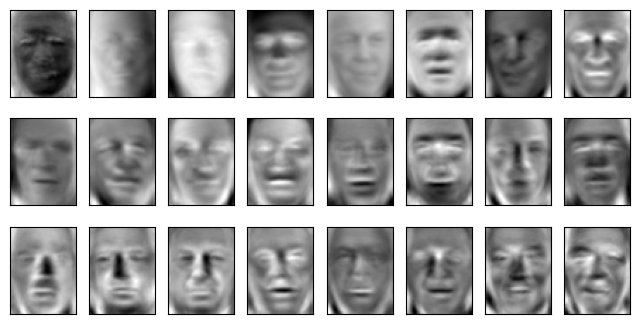

In [20]:
# 绘制特征脸
fig, axes = plt.subplots(3, 8, figsize=(8, 4),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i, :].reshape(62, 47), cmap='gray')

In [21]:
pca = PCA(150)
x_dr = pca.fit_transform(X)
x_dr.shape

(1348, 150)

In [22]:
# 恢复数据
x_inverse = pca.inverse_transform(x_dr)
x_inverse.shape

(1348, 2914)

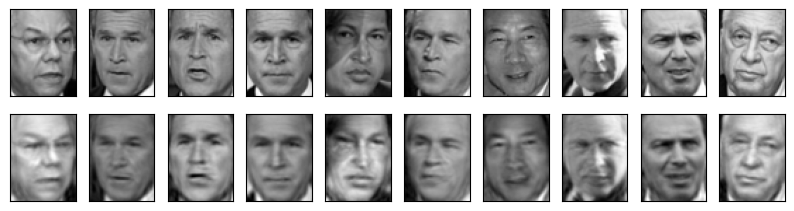

In [28]:
# 可视化
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]})
for i in range(10):
    ax[0, i].imshow(faces.images[i, :, :], cmap='binary_r')
    ax[1, i].imshow(x_inverse[i].reshape(62, 47), cmap='binary_r')